# Data Challenge Text-Mining Green Way

# Data Preparation 

In [1]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'E:/python/Dataset/OnlineNewsPopularity.csv'
df = pd.read_csv("OnlineNewsPopularity.csv")

In [5]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [17]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [7]:
# Display basic info about the dataset
print("Dataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [9]:
df.shape

(39644, 61)

In [10]:
df.columns = df.columns.str.replace(' ', '')

In [12]:
# Feature Extraction from URL
def extract_url_features(url):
    parsed_url = urlparse(url)
    return pd.Series({
        'domain': parsed_url.netloc,
        'url_length': len(url),
        'num_subdirectories': url.count('/')
    })

df[['domain', 'url_length', 'num_subdirectories']] = df['url'].apply(extract_url_features)


In [13]:
# Web Scraping: Extract Title or Meta Description from URL (Optional & Time-Consuming)
def fetch_page_title(url):
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.title.string if soup.title else "No Title"
        return title
    except:
        return "Error"

In [48]:
# Uncomment the next line to scrape titles (Warning: This is slow!)
# df['page_title'] = df['url'].apply(fetch_page_title)

In [16]:
df['tokens_content']

KeyError: 'tokens_content'

In [15]:
# # Feature Engineering: Creating additional features
df['content_length_category'] = pd.cut(df['tokens_content'], bins=[0, 300, 600, np.inf], labels=['Short', 'Medium', 'Long'])
df['num_media'] = df['images_content'] + df['videos_content']  # Total media count
df['keyword_density'] = df['keywords_content'] / (df['tokens_content'] + 1)  # Avoid division by zero

KeyError: 'tokens_content'

# Feature Engineering 

## Scaterplots, boxplots, histograms and Matrix correlation

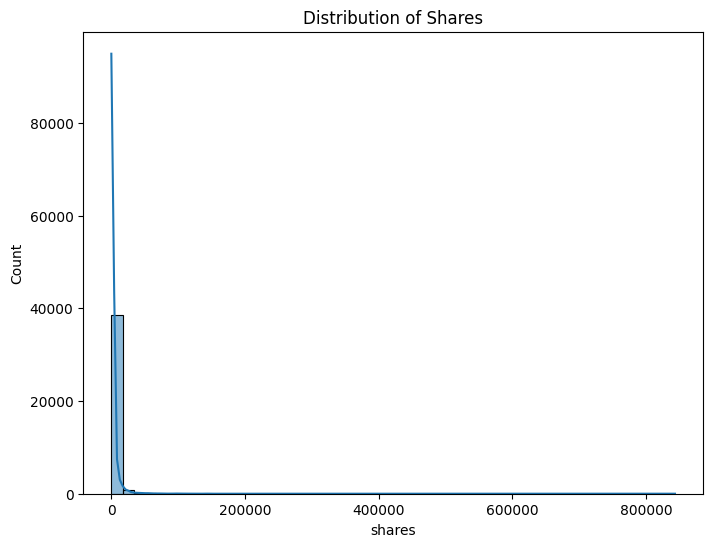

In [16]:
# Histogram of the variable (target) 'shares'
plt.figure(figsize=(8, 6))
sns.histplot(df['shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.show()

Text(0.5, 0, 'Number of Shares')

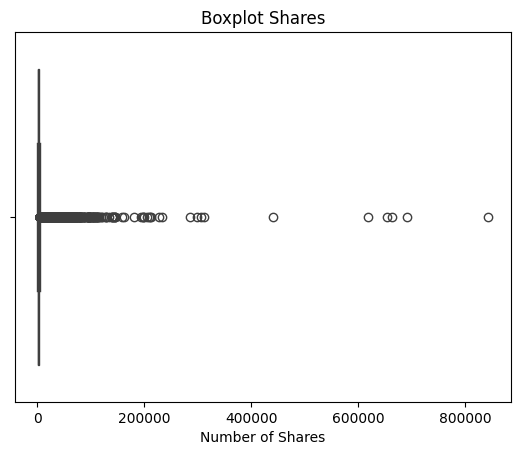

In [18]:
g = sns.boxplot(data = df, x='shares')
g.set_title('Boxplot Shares')
g.set_xlabel('Number of Shares')

In [22]:
df['shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df['shares'])
abs_z_score = np.abs(z_scores)

outliers = df[abs_z_score > 3]
outliers.head()

[-0.24102756 -0.23087859 -0.16301816 ... -0.12861489 -0.19742142
 -0.18021979]
[0.24102756 0.23087859 0.16301816 ... 0.12861489 0.19742142 0.18021979]


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
410,http://mashable.com/2013/01/14/rha-sci-fi-short/,724.0,13.0,749.0,0.424528,1.0,0.613065,8.0,3.0,1.0,...,0.100000,1.00,-0.230556,-0.500,-0.155556,0.166667,0.033333,0.333333,0.033333,39400
564,http://mashable.com/2013/01/16/reddit-most-bea...,722.0,12.0,171.0,0.666667,1.0,0.863636,4.0,1.0,2.0,...,0.433333,0.85,-0.200000,-0.200,-0.200000,0.750000,0.675000,0.250000,0.675000,51900
969,http://mashable.com/2013/01/23/unlocking-cellp...,715.0,10.0,548.0,0.483333,1.0,0.677852,6.0,0.0,1.0,...,0.100000,0.60,-0.125000,-0.125,-0.125000,0.500000,-0.500000,0.000000,0.500000,39200
1391,http://mashable.com/2013/01/30/paperman/,708.0,10.0,179.0,0.691011,1.0,0.870370,4.0,3.0,0.0,...,0.100000,0.50,-0.408333,-0.625,-0.300000,0.450000,0.250000,0.050000,0.250000,69100
1508,http://mashable.com/2013/02/01/future-predicti...,706.0,6.0,154.0,0.647059,1.0,0.855263,8.0,4.0,0.0,...,0.050000,0.85,0.000000,0.000,0.000000,0.125000,0.000000,0.375000,0.000000,40100


In [25]:
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 308


In [5]:
# Import MAD estimator
from pyod.models.mad import MAD

# Set threshold to 3.5
mad = MAD(threshold = 3.5)

# Convert the 'total' column into a 2D numpy array
total_reshaped = df['shares'].values.reshape(-1, 1)

# Generate inline and outlier labels
labels = mad.fit(total_reshaped).labels_
labels

c:\Users\sebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\sebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [6]:
print(f'Number of outliers: {labels.sum()}')

Number of outliers: 5713


In [8]:
df.shape

(39644, 61)

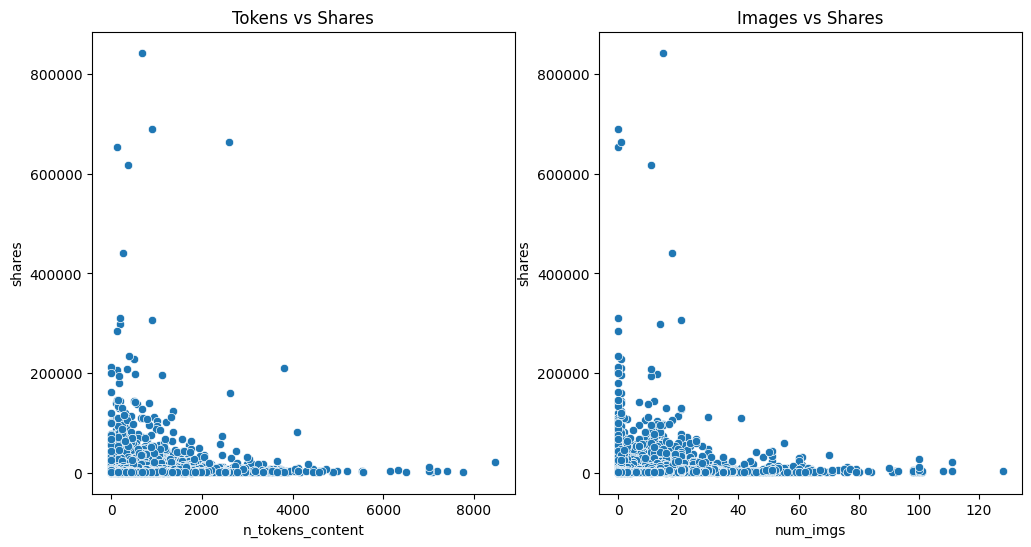

In [52]:
# Scatterplot of some features vs 'shares'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='n_tokens_content', y='shares', data=df)
plt.title('Tokens vs Shares')

plt.subplot(1, 2, 2)
sns.scatterplot(x='num_imgs', y='shares', data=df)
plt.title('Images vs Shares')
plt.show()

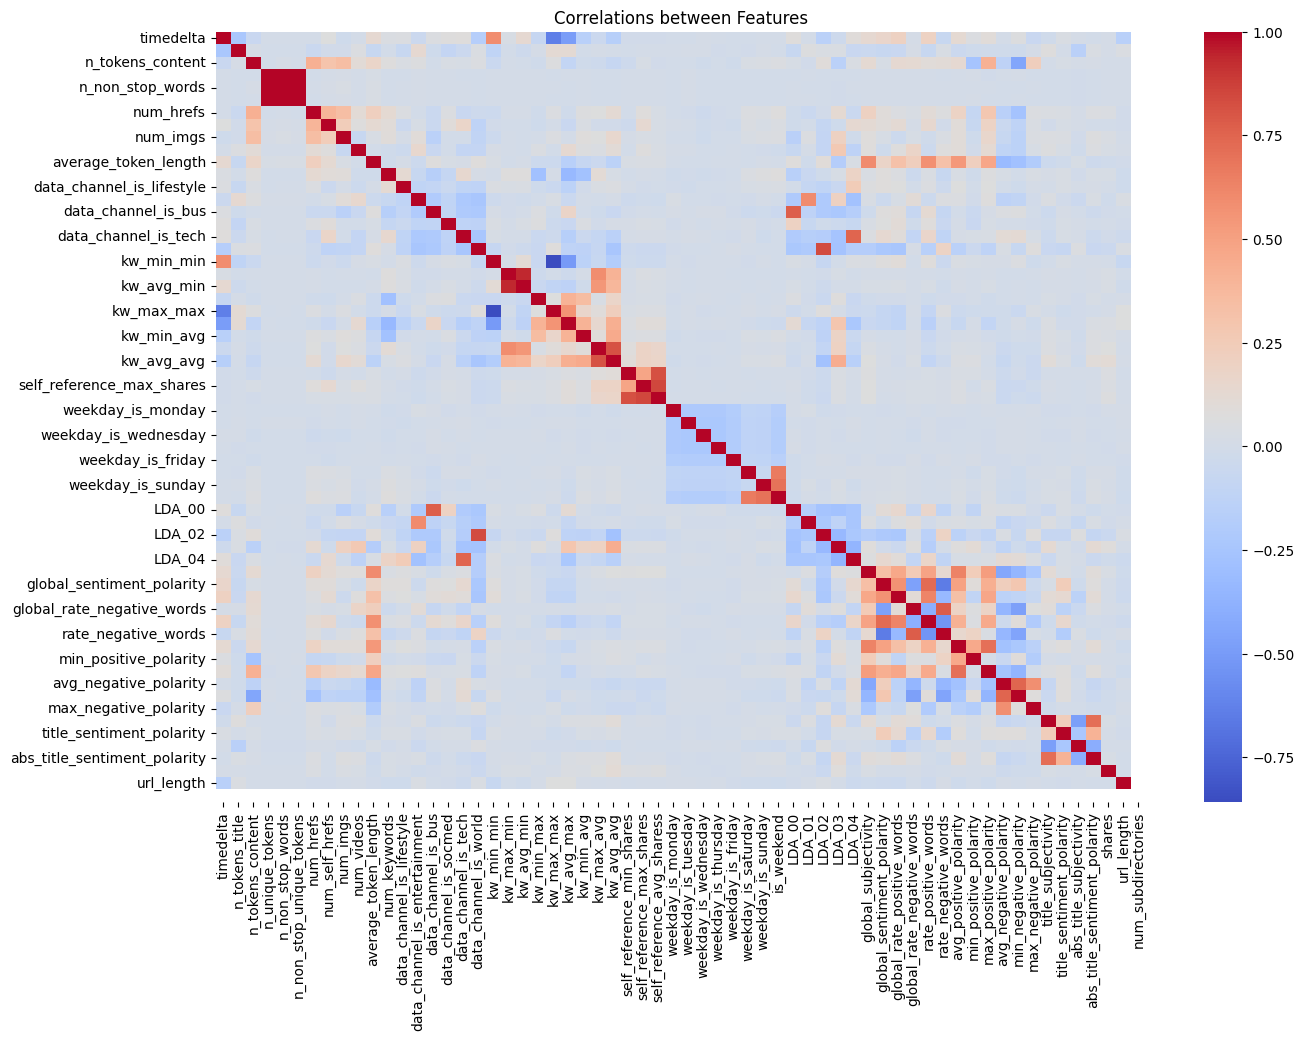

In [ ]:
#  Correlation Heatmap 
plt.figure(figsize=(15, 10))

# Exclude columns no numerics
numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlations between Features')
plt.show()

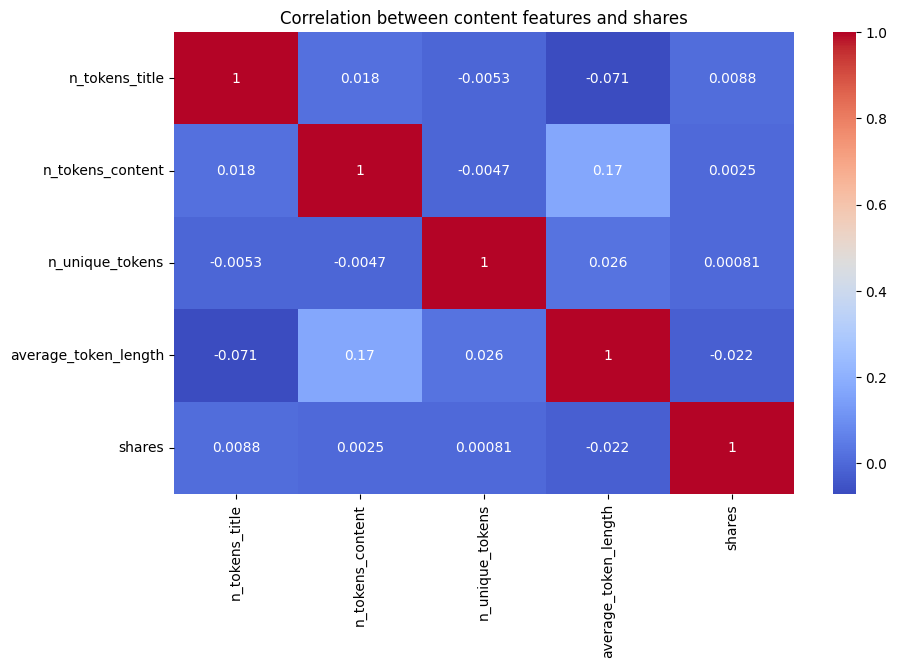

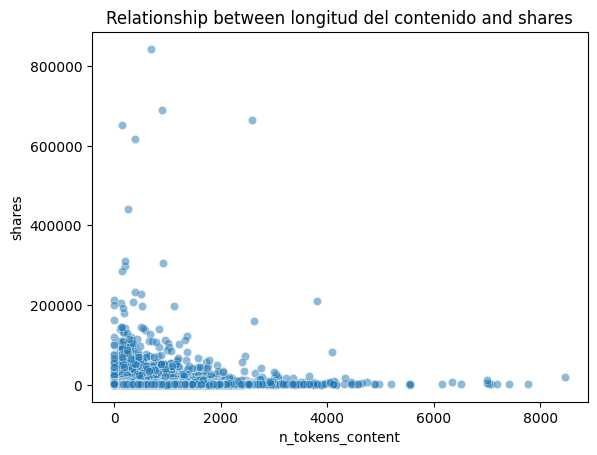

In [ ]:
# Content features
content_features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'average_token_length']

# Correlation with 'shares'
corr_matrix = df[content_features + ['shares']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between content features and shares")
plt.show()

# Scatterplot for 'n_tokens_content' vs 'shares'
sns.scatterplot(x=df['n_tokens_content'], y=df['shares'], alpha=0.5)
plt.title("Relationship between longitud del contenido and shares")
plt.show()

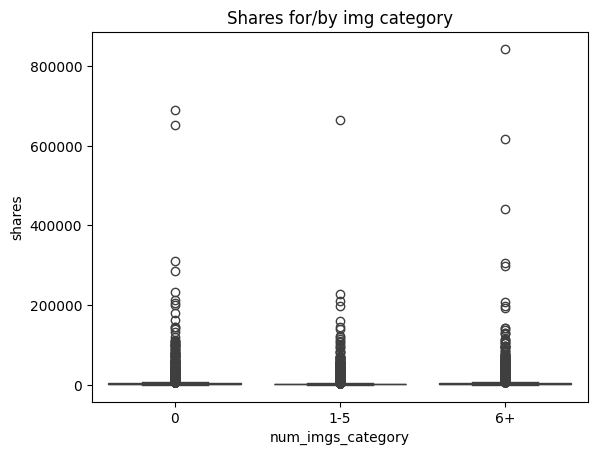

In [53]:
# Create categories: 0 (no imgs), 1-5, 6+ imgs
df['num_imgs_category'] = pd.cut(df['num_imgs'], bins=[-1, 0, 5, np.inf], labels=['0', '1-5', '6+'])

# Boxplot
sns.boxplot(x=df['num_imgs_category'], y=df['shares'])
plt.title("Shares for/by img category")
plt.show()

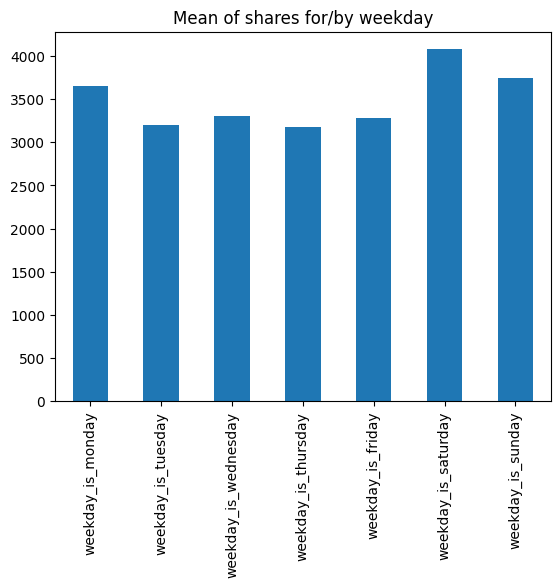

In [54]:
weekday_cols = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']

# Calcule mean of shares for/by day
shares_by_day = df[weekday_cols].multiply(df['shares'], axis=0).sum() / df[weekday_cols].sum()

# Barplot
shares_by_day.plot(kind='bar')
plt.title("Mean of shares for/by weekday")
plt.show()

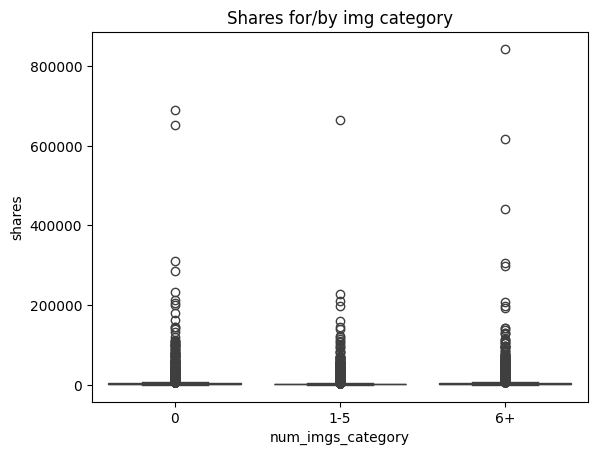

In [55]:
# Create categories: 0 (no imgs), 1-5, 6+ imgs
df['num_imgs_category'] = pd.cut(df['num_imgs'], bins=[-1, 0, 5, np.inf], labels=['0', '1-5', '6+'])

# Boxplot
sns.boxplot(x=df['num_imgs_category'], y=df['shares'])
plt.title("Shares for/by img category")
plt.show()

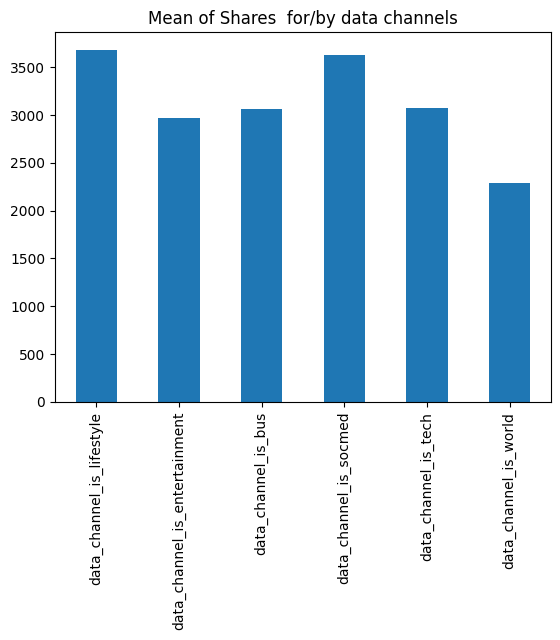

In [10]:
channels = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']


shares_by_channel = df[channels].multiply(df['shares'], axis=0).sum() / df[channels].sum()

shares_by_channel.plot(kind='bar')
plt.title("Mean of Shares  for/by data channels")
plt.show()

In [14]:
shares_by_channel

data_channel_is_lifestyle        3682.123392
data_channel_is_entertainment    2970.487034
data_channel_is_bus              3063.018536
data_channel_is_socmed           3629.383125
data_channel_is_tech             3072.283283
data_channel_is_world            2287.734069
dtype: float64

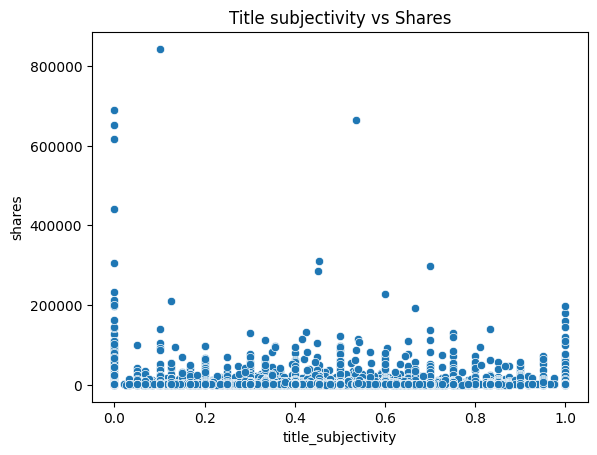

In [57]:
sns.scatterplot(x=df['title_subjectivity'], y=df['shares'])
plt.title("Title subjectivity vs Shares")
plt.show()

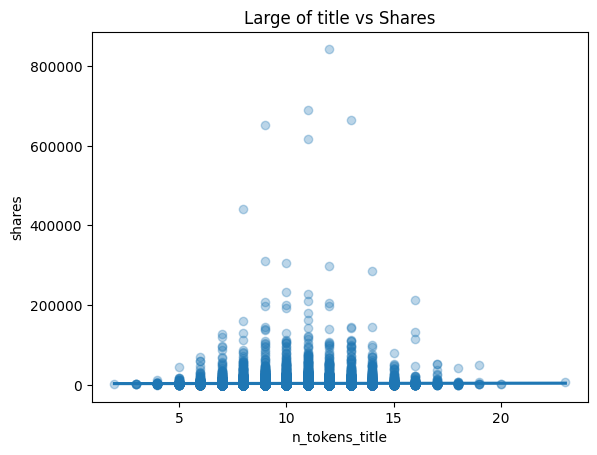

In [58]:
sns.regplot(x=df['n_tokens_title'], y=df['shares'], scatter_kws={'alpha':0.3})
plt.title("Large of title vs Shares")
plt.show()

In [ ]:
# # Feature Engineering: Creating additional features
# columns_to_check = ['n_tokens_content', 'num_imgs', 'num_videos', 'num_keywords']
# missing_columns = [col for col in columns_to_check if col not in df.columns]

# columns_to_check
# missing_columns

In [ ]:
# if not missing_columns:
#     df['content_length_category'] = pd.cut(df['n_tokens_content'], bins=[0, 300, 600, np.inf], labels=['Short', 'Medium', 'Long'])
#     df['num_media'] = df['num_imgs'] + df['num_videos']  # Total media count
#     df['keyword_density'] = df['num_keywords'] / (df['n_tokens_content'] + 1)  # Avoid division by zero
# else:
#     print(f"Warning: Missing columns in dataset - {missing_columns}")

In [ ]:
# # Text-based Feature Extraction: Sentiment Analysis
# def analyze_sentiment(text):
#     blob = TextBlob(str(text))
#     return pd.Series({
#         'text_sentiment_polarity': blob.sentiment.polarity,
#         'text_subjectivity': blob.sentiment.subjectivity
#     })

In [ ]:
# # Apply sentiment analysis if 'title' column exists
# if 'title' in df.columns:
#     df[['text_sentiment_polarity', 'text_subjectivity']] = df['title'].apply(analyze_sentiment)
# else:
#     print("Warning: 'title' column not found, skipping sentiment analysis.")